# Zomato Restaurant Ratings

## ABSTRACT

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

• Location of the restaurant

• Approx Price of food

• Theme based restaurant or not

• Which locality of that city serves that cuisines with maximum number of restaurants

• The needs of people who are striving to get the best cuisine of the neighborhood

• Is a particular neighborhood famous for its own kind of food.
“Just so that you have a good meal the next time you step out”


The data is accurate to that available on the zomato website until 15 March 2019. The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

Acknowledgements The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

    
Main Objective:

The main agenda of this project is:

          Perform extensive Exploratory Data Analysis(EDA) on the               Zomato Dataset.

         Build an appropriate Machine Learning Model that will                help various Zomato Restaurants to predict their                      respective Ratings based on certain features

## Feature description



1.url contains the url of the restaurant in the zomato website

2.address contains the address of the restaurant in Bengaluru

3.name contains the name of the restaurant

4.online_order whether online ordering is available in the restaurant or not

5.book_table table book option available or not

6.rate contains the overall rating of the restaurant out of 5

7.votes contains total number of rating for the restaurant as of the above mentioned date

8.phone contains the phone number of the restaurant

9.location contains the neighborhood in which the restaurant is located

10.rest_type restaurant type

11.dish_liked dishes people liked in the restaurant

12.cuisines food styles, separated by comma

13.approx_cost(for two people) contains the approximate cost of meal for two people

14.reviews_list list of tuples containing reviews for the restaurant, each tuple

15.menu_item contains list of menus available in the restaurant

16.listed_in(type) type of meal

17.listed_in(city) contains the neighborhood in which the restaurant is listed

## 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import nltk

# 1.1 Loading the dataset

In [2]:
%cd c:\jan20

c:\jan20


In [3]:
import pandas as pd

# Try different encodings
try:
    data = pd.read_csv('zomato.csv', encoding='utf-8')  # Default encoding
except UnicodeDecodeError:
    try:
        data = pd.read_csv('zomato.csv', encoding='ISO-8859-1')  # Latin-1 encoding
    except UnicodeDecodeError:
        data = pd.read_csv('zomato.csv', encoding='cp1252')

In [4]:
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,Unnamed: 4150,Unnamed: 4151,Unnamed: 4152,Unnamed: 4153,Unnamed: 4154,Unnamed: 4155,Unnamed: 4156,Unnamed: 4157,Unnamed: 4158,Unnamed: 4159
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,Unnamed: 4150,Unnamed: 4151,Unnamed: 4152,Unnamed: 4153,Unnamed: 4154,Unnamed: 4155,Unnamed: 4156,Unnamed: 4157,Unnamed: 4158,Unnamed: 4159
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56245,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56246,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56247,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56248,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(56250, 4160)

In [7]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type',
       ...
       'Unnamed: 4150', 'Unnamed: 4151', 'Unnamed: 4152', 'Unnamed: 4153',
       'Unnamed: 4154', 'Unnamed: 4155', 'Unnamed: 4156', 'Unnamed: 4157',
       'Unnamed: 4158', 'Unnamed: 4159'],
      dtype='object', length=4160)

there are total rows 56250 and 4160 columns                

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56250 entries, 0 to 56249
Columns: 4160 entries, url to Unnamed: 4159
dtypes: object(4160)
memory usage: 1.7+ GB


In [9]:
df=data[['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type','dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)']]

In [10]:
drop_columns=['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type','dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)']

In [11]:
data=data.drop(columns=drop_columns)

In [12]:
data.columns

Index(['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26',
       ...
       'Unnamed: 4150', 'Unnamed: 4151', 'Unnamed: 4152', 'Unnamed: 4153',
       'Unnamed: 4154', 'Unnamed: 4155', 'Unnamed: 4156', 'Unnamed: 4157',
       'Unnamed: 4158', 'Unnamed: 4159'],
      dtype='object', length=4143)

In [13]:
df.shape

(56250, 17)

In [14]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56250 entries, 0 to 56249
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          56200 non-null  object
 1   address                      56235 non-null  object
 2   name                         56236 non-null  object
 3   online_order                 56234 non-null  object
 4   book_table                   56194 non-null  object
 5   rate                         48414 non-null  object
 6   votes                        56174 non-null  object
 7   phone                        54956 non-null  object
 8   location                     56128 non-null  object
 9   rest_type                    55914 non-null  object
 10  dish_liked                   28049 non-null  object
 11  cuisines                     56049 non-null  object
 12  approx_cost(for two people)  55745 non-null  object
 13  reviews_list                 56

There are all object type columns,we have to convert them into numeric type.letter we will convert object dtype to numeric type

In [16]:
df.isnull().sum()

url                               50
address                           15
name                              14
online_order                      16
book_table                        56
rate                            7836
votes                             76
phone                           1294
location                         122
rest_type                        336
dish_liked                     28201
cuisines                         201
approx_cost(for two people)      505
reviews_list                     187
menu_item                       4566
listed_in(type)                 4595
listed_in(city)                 4624
dtype: int64

There are all columns null values,so firstly we have to handle the missing values.

## 2.2 Removing the unnecessary column from data

In [17]:
df=df.drop(['url','phone'],axis=1)

In [18]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 2.3 Handling the null or missing values

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

Now there are no null value

## 2.4 Checking the duplicate & handling the duplicates values

In [21]:
df.duplicated().sum()

307

In [22]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Now there are no duplicate values

## 2.5 Renaming the columns appropriately

In [23]:
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                         'listed_in(type)':'type', 'listed_in(city)': 'city'})

In [24]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Sucessfuly rename the columns

In [25]:
df.tail(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
56238,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
56240,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
56241,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
56244,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
56248,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## 2.6 cleaning the 'cost' column

In [26]:
df['cost'].unique()

array(['800', '300', '600', ...,
       " it becomes quiet dark after 6:30-7 and it's difficult to read the menu or eat the food in the dark. Rest all was good",
       ' Croquettines', ' chk sausages (good)'], dtype=object)

here we can see that data point is string type and some values like 5,000 6,000 have comma(,). we have to remove that ',' from the values and we have convert them into numeric type.

In [27]:
# Check for rows that contain non-numeric values
non_numeric_rows = df[~df['cost'].str.replace(',', '').str.isnumeric()]
print(non_numeric_rows)

                                                 address  \
9       things tend to get smokey due to the sizzlers...   
33                                          ('Rated 2.0'   
37      chicken tikka and tandoori sauce.\n\nOverall ...   
42                                          ('Rated 5.0'   
49                                   so I could eat more   
...                                                  ...   
56221                                       ('Rated 5.0'   
56223   which were great and not pricey because of ha...   
56227                                       ('Rated 4.0'   
56232                                       ('Rated 2.0'   
56234   as per my experience service was really slow ...   

                                                    name  \
9       service was sluggish as they took too long to...   
33                       'RATED\n  not that much worth')   
37             Will Recommend To Everyone.\n\nCheers!!')   
42                       'RATED\n  We e

In [28]:
import re

# Function to check if a string can be converted to a float
def is_numeric(value):
    if pd.isna(value):
        return False
    try:
        float(value)
        return True
    except ValueError:
        return False

# Filter out rows where 'cost' is not numeric
non_numeric_rows = df[~df['cost'].apply(is_numeric)]
print(non_numeric_rows)

                                                 address  \
9       things tend to get smokey due to the sizzlers...   
33                                          ('Rated 2.0'   
37      chicken tikka and tandoori sauce.\n\nOverall ...   
42                                          ('Rated 5.0'   
49                                   so I could eat more   
...                                                  ...   
56237  2nd Floor, Phoenix Market City, Whitefield, Ba...   
56238  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
56240  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
56241  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
56248  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name  \
9       service was sluggish as they took too long to...   
33                       'RATED\n  not that much worth')   
37             Will Recommend To Everyone.\n\nCheers!!')   
42                       'RATED\n  We e

In [29]:
# Remove rows with non-numeric values in 'cost'
df = df[df['cost'].apply(is_numeric)]

In [30]:
# Remove commas and convert to float
df['cost'] = df['cost'].str.replace(',', '')
df['cost'] = df['cost'].astype(float)

In [31]:
print(df['cost'].unique())

[800. 300. 600. 550. 500. 450. 650. 700. 400. 750. 200. 850. 150. 350.
 250. 100. 900. 230. 950. 180. 330.  40. 120.]


Now sucessfully we converted the values into nimeric type

In [32]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.2/5', '4.0/5', '3.9/5',
       '3.0/5', '3.6/5', '3.1/5', '4.3/5', '4.4/5', '2.6/5', '3.3/5',
       '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '3.4/5', '2.8/5',
       '2.7/5', '4.7/5', '2.9/5', 'NEW', '2.2/5', '2.3/5', '2.4/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.3 /5', '3.7 /5', '4.4 /5', '2.1/5', '4.9/5',
       '3.4 /5', '3.6 /5', '3.3 /5', '4.6 /5', '4.5 /5', '3.2 /5',
       '2.8 /5', '3.5 /5', '3.1 /5', '3.0 /5', '2.9 /5', '2.4 /5',
       '4.7 /5', '2.3 /5', '4.8 /5', '2.0 /5', '2.1 /5', '2.2 /5'],
      dtype=object)

here rating column also string type. we have to convert them into numeric type. we have to remove the '/5' form given values. there is 'NEW' value which make no sense. SO we have to remove that values.

In [33]:
df=df.loc[df.rate !='NEW'] # geting rid of 'NEW'

In [34]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.2/5', '4.0/5', '3.9/5',
       '3.0/5', '3.6/5', '3.1/5', '4.3/5', '4.4/5', '2.6/5', '3.3/5',
       '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '3.4/5', '2.8/5',
       '2.7/5', '4.7/5', '2.9/5', '2.2/5', '2.3/5', '2.4/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.7 /5', '2.5 /5',
       '2.6 /5', '4.3 /5', '3.7 /5', '4.4 /5', '2.1/5', '4.9/5', '3.4 /5',
       '3.6 /5', '3.3 /5', '4.6 /5', '4.5 /5', '3.2 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '3.0 /5', '2.9 /5', '2.4 /5', '4.7 /5',
       '2.3 /5', '4.8 /5', '2.0 /5', '2.1 /5', '2.2 /5'], dtype=object)

In [35]:
df['rate']= df['rate'].apply(lambda x:x.replace('/5',''))

df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.2', '4.0', '3.9', '3.0', '3.6',
       '3.1', '4.3', '4.4', '2.6', '3.3', '3.5', '3.8 ', '3.2', '4.5',
       '2.5', '3.4', '2.8', '2.7', '4.7', '2.9', '2.2', '2.3', '2.4',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.7 ', '2.5 ', '2.6 ',
       '4.3 ', '3.7 ', '4.4 ', '2.1', '4.9', '3.4 ', '3.6 ', '3.3 ',
       '4.6 ', '4.5 ', '3.2 ', '2.8 ', '3.5 ', '3.1 ', '3.0 ', '2.9 ',
       '2.4 ', '4.7 ', '2.3 ', '4.8 ', '2.0 ', '2.1 ', '2.2 '],
      dtype=object)

In [36]:
df['rate']= df['rate'].apply(lambda x: float(x))
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
56130    3.8
56139    3.4
56155    3.6
56199    2.5
56244    2.5
Name: rate, Length: 15018, dtype: float64

Now our data is cleaned and we can perform visualization

## 3. Data Visualization

### 3.1 Most famous restaurant chains in banglore

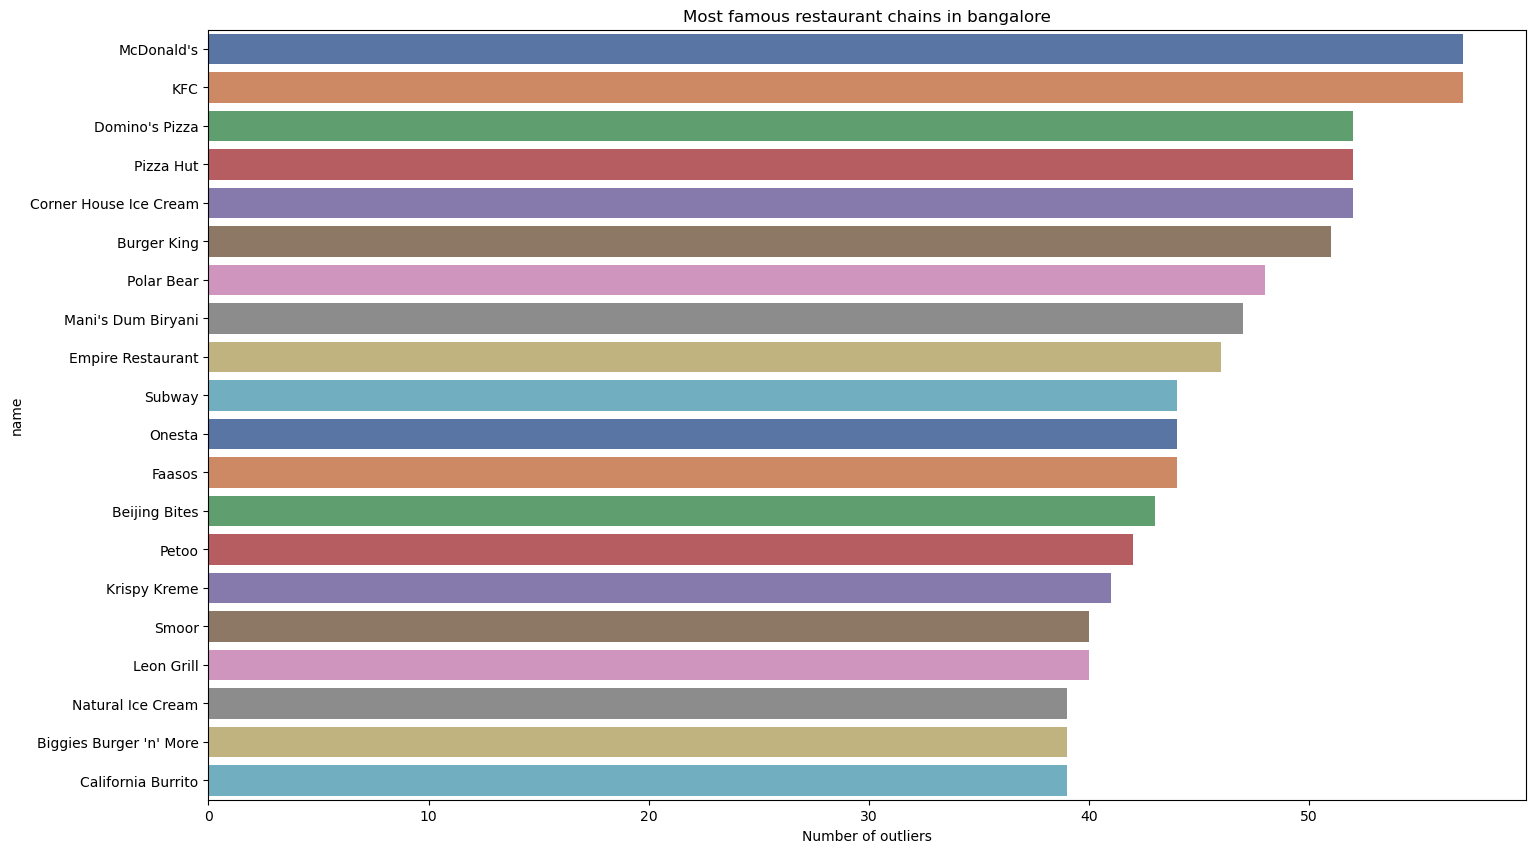

In [37]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title('Most famous restaurant chains in bangalore')
plt.xlabel('Number of outliers')
plt.show()

Insights:
    
    'McDonalds','KFC' & 'Piza Hut' are the most famous restaurant in bangalore.

## 3.2 checking online order or not

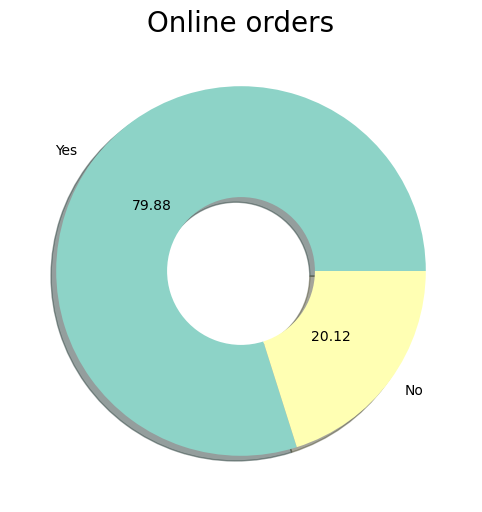

In [38]:
v = df['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Online orders', fontsize = 20)
plt.show()

Insight:
   
     Most Restaurants offer option for online order and delivery.

## 3.3 Book table or not

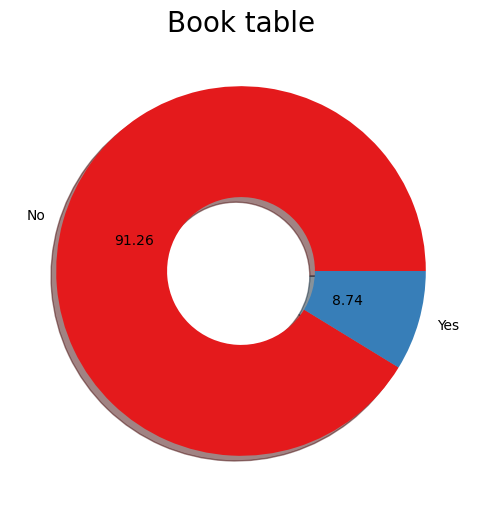

In [39]:
v= df['book_table'].value_counts()

fig=plt.gcf()
fig.set_size_inches((8,6))
cmap=plt.get_cmap('Set1')
color=cmap(np.arange(len(v)))

plt.pie(v,labels=v.index,wedgeprops=dict(width=0.6),autopct='%0.02f',shadow = True, colors=color)
plt.title('Book table',fontsize=20)
plt.show()

Insight:
     
        most of restaurant doesn't offer table booking.

## 3.4 Rating Distribution

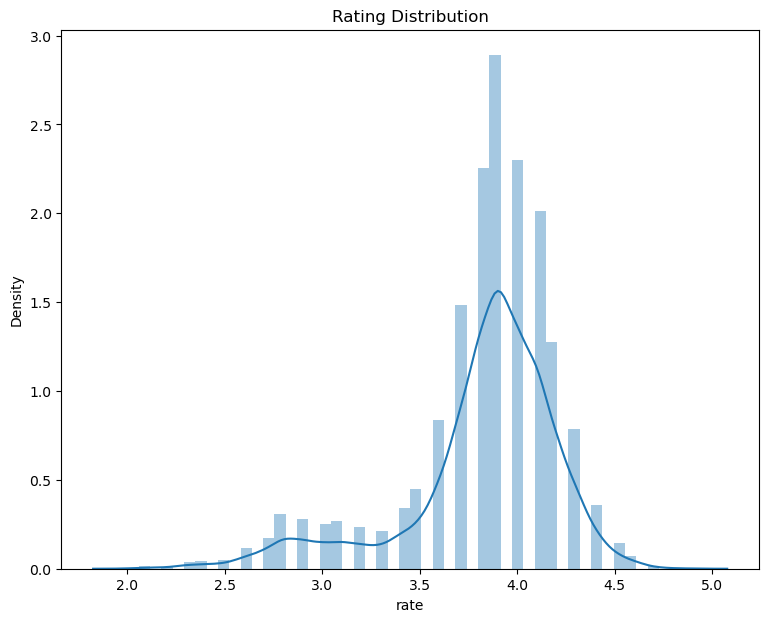

In [40]:
plt.figure(figsize=(9,7))
sns.distplot(df['rate'])
plt.title("Rating Distribution")
plt.show()

Insight:
    
     We ca infer from above that most of the rating are within 3.5 to 4.5

## 3.5 Location

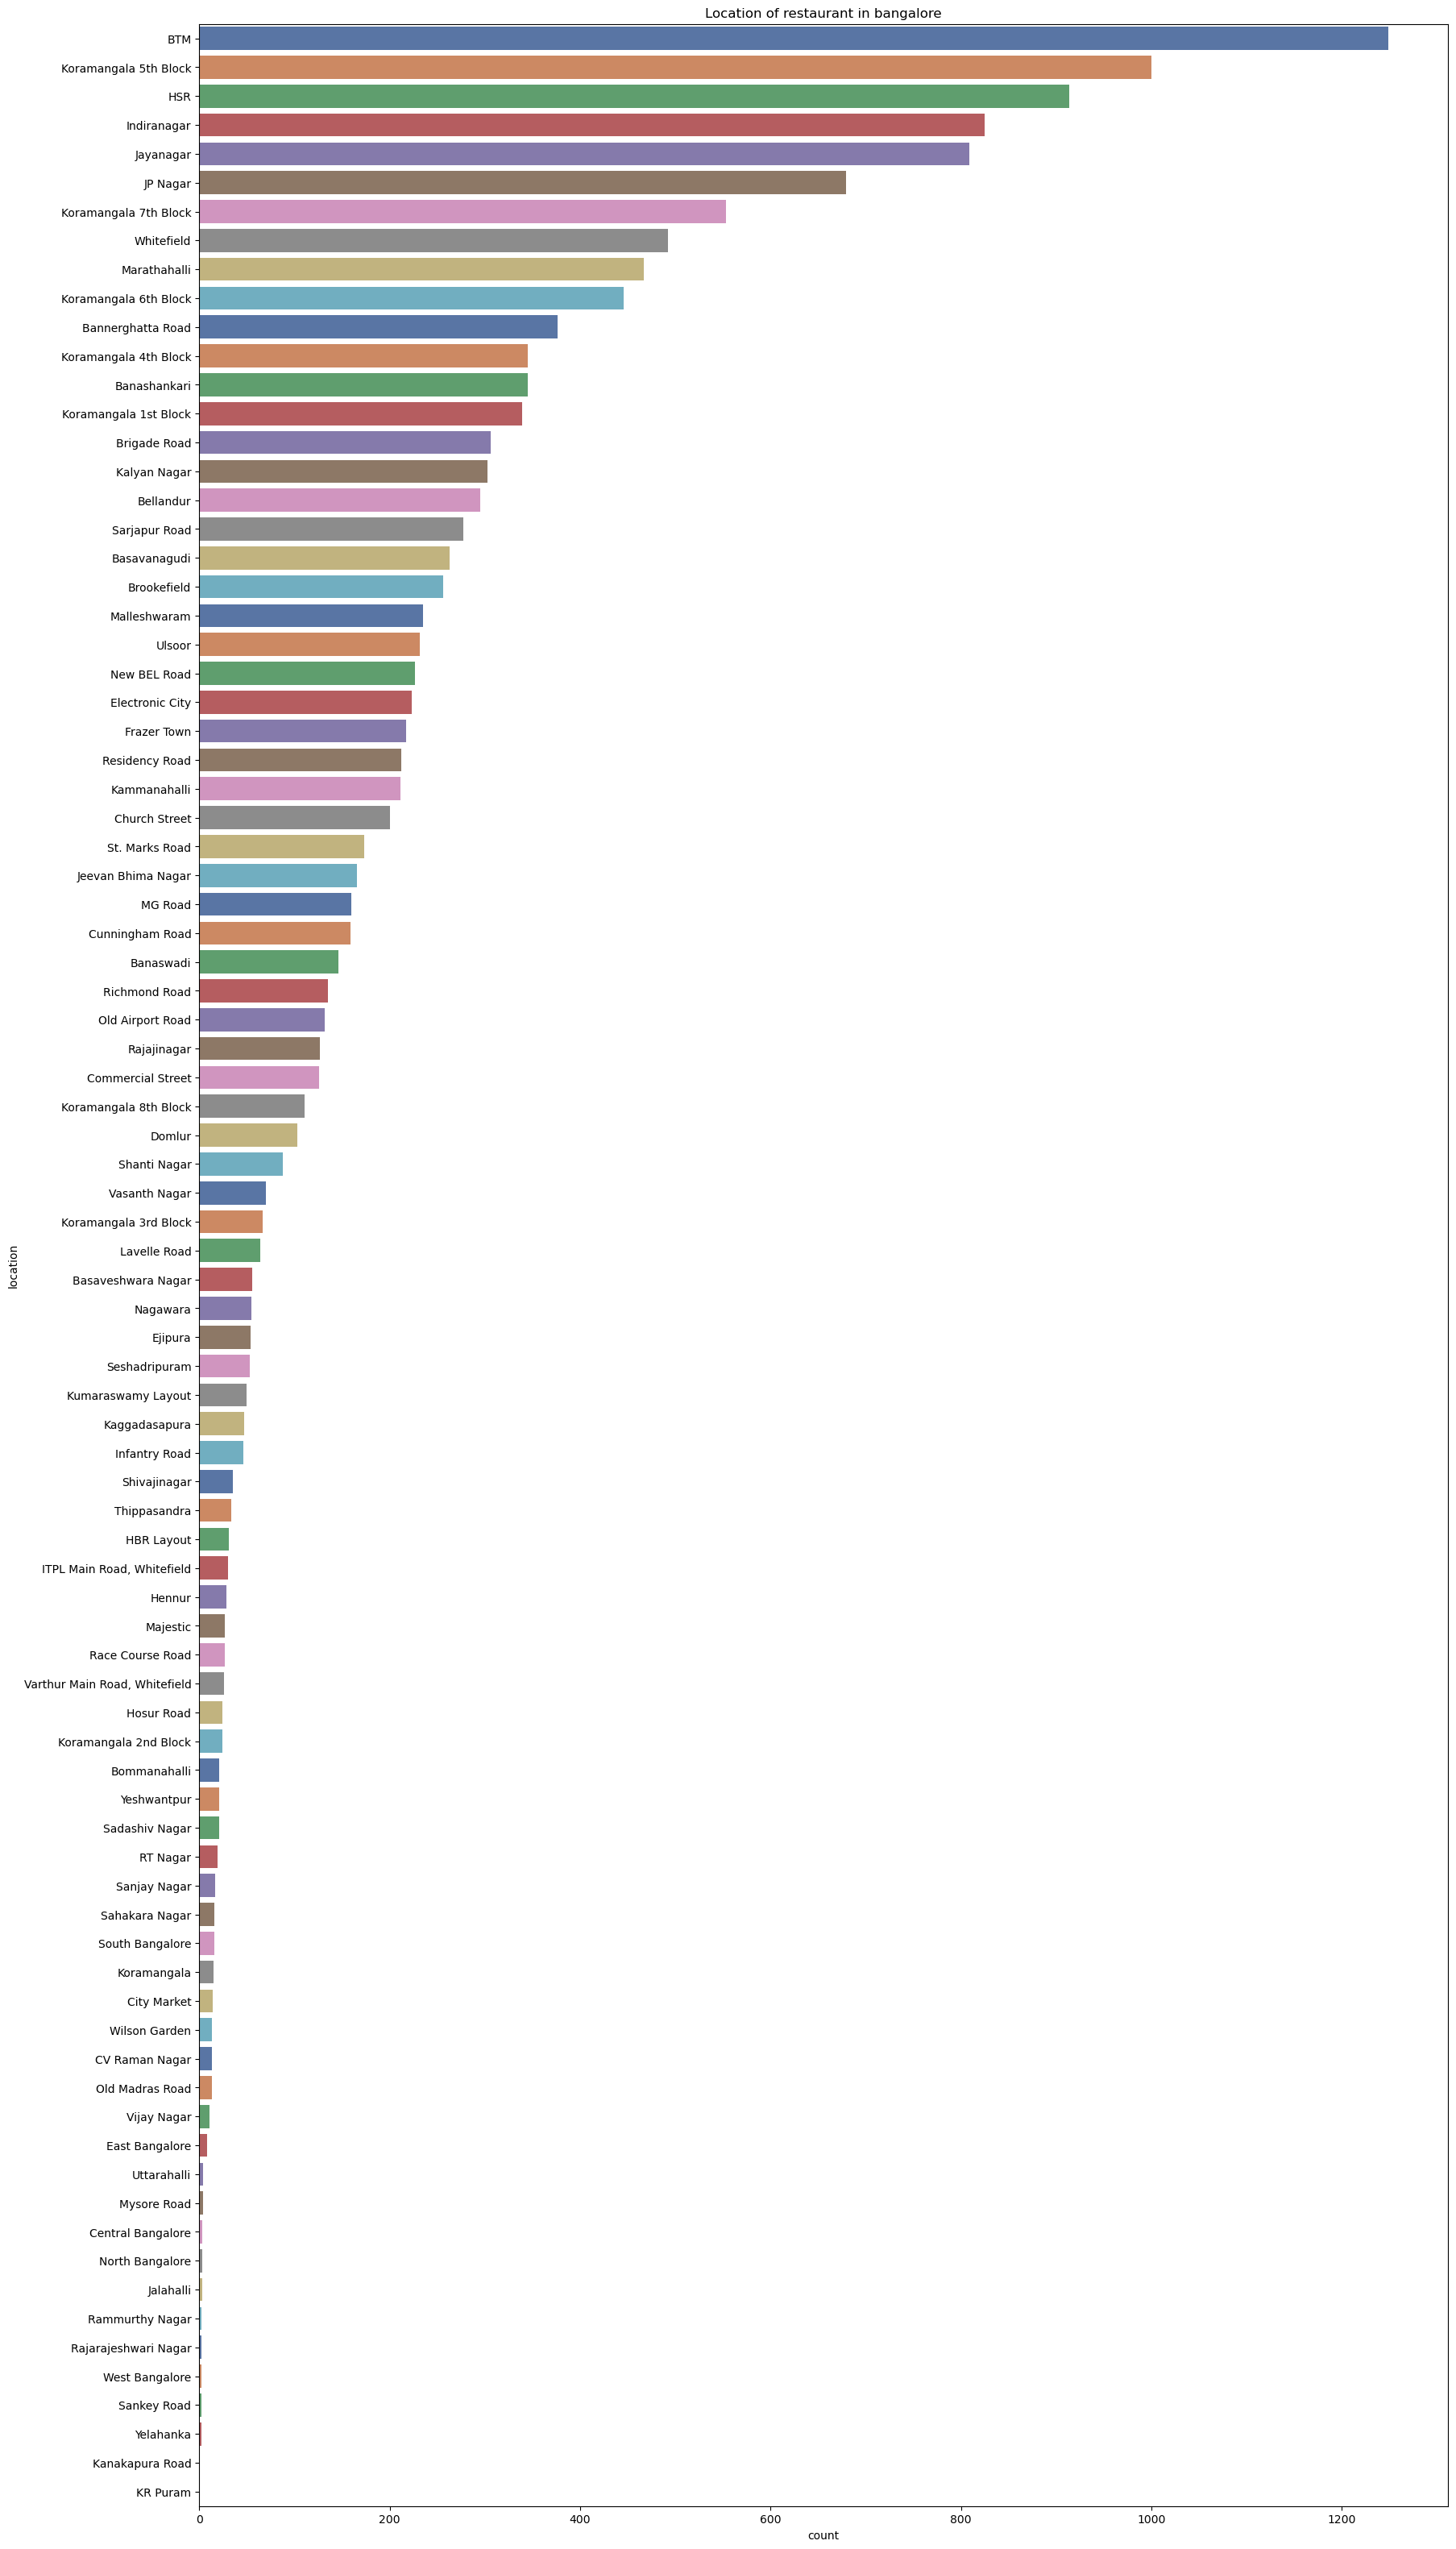

In [41]:
plt.figure(figsize=(20,40))
chains =df['location'].value_counts()
sns.barplot(x = chains,y= chains.index,palette='deep')
plt.title('Location of restaurant in bangalore')
plt.show()

Insight:
    
    Here above we can see that most of the restaurants located in 'BTM','Koramangala 5th Block' & 'Indiranagar'.
    Then least restaurants are located 'KR Puram', 'Kanakapura Road', 'West Bangalore'.

## 3.6 Restaurant Type

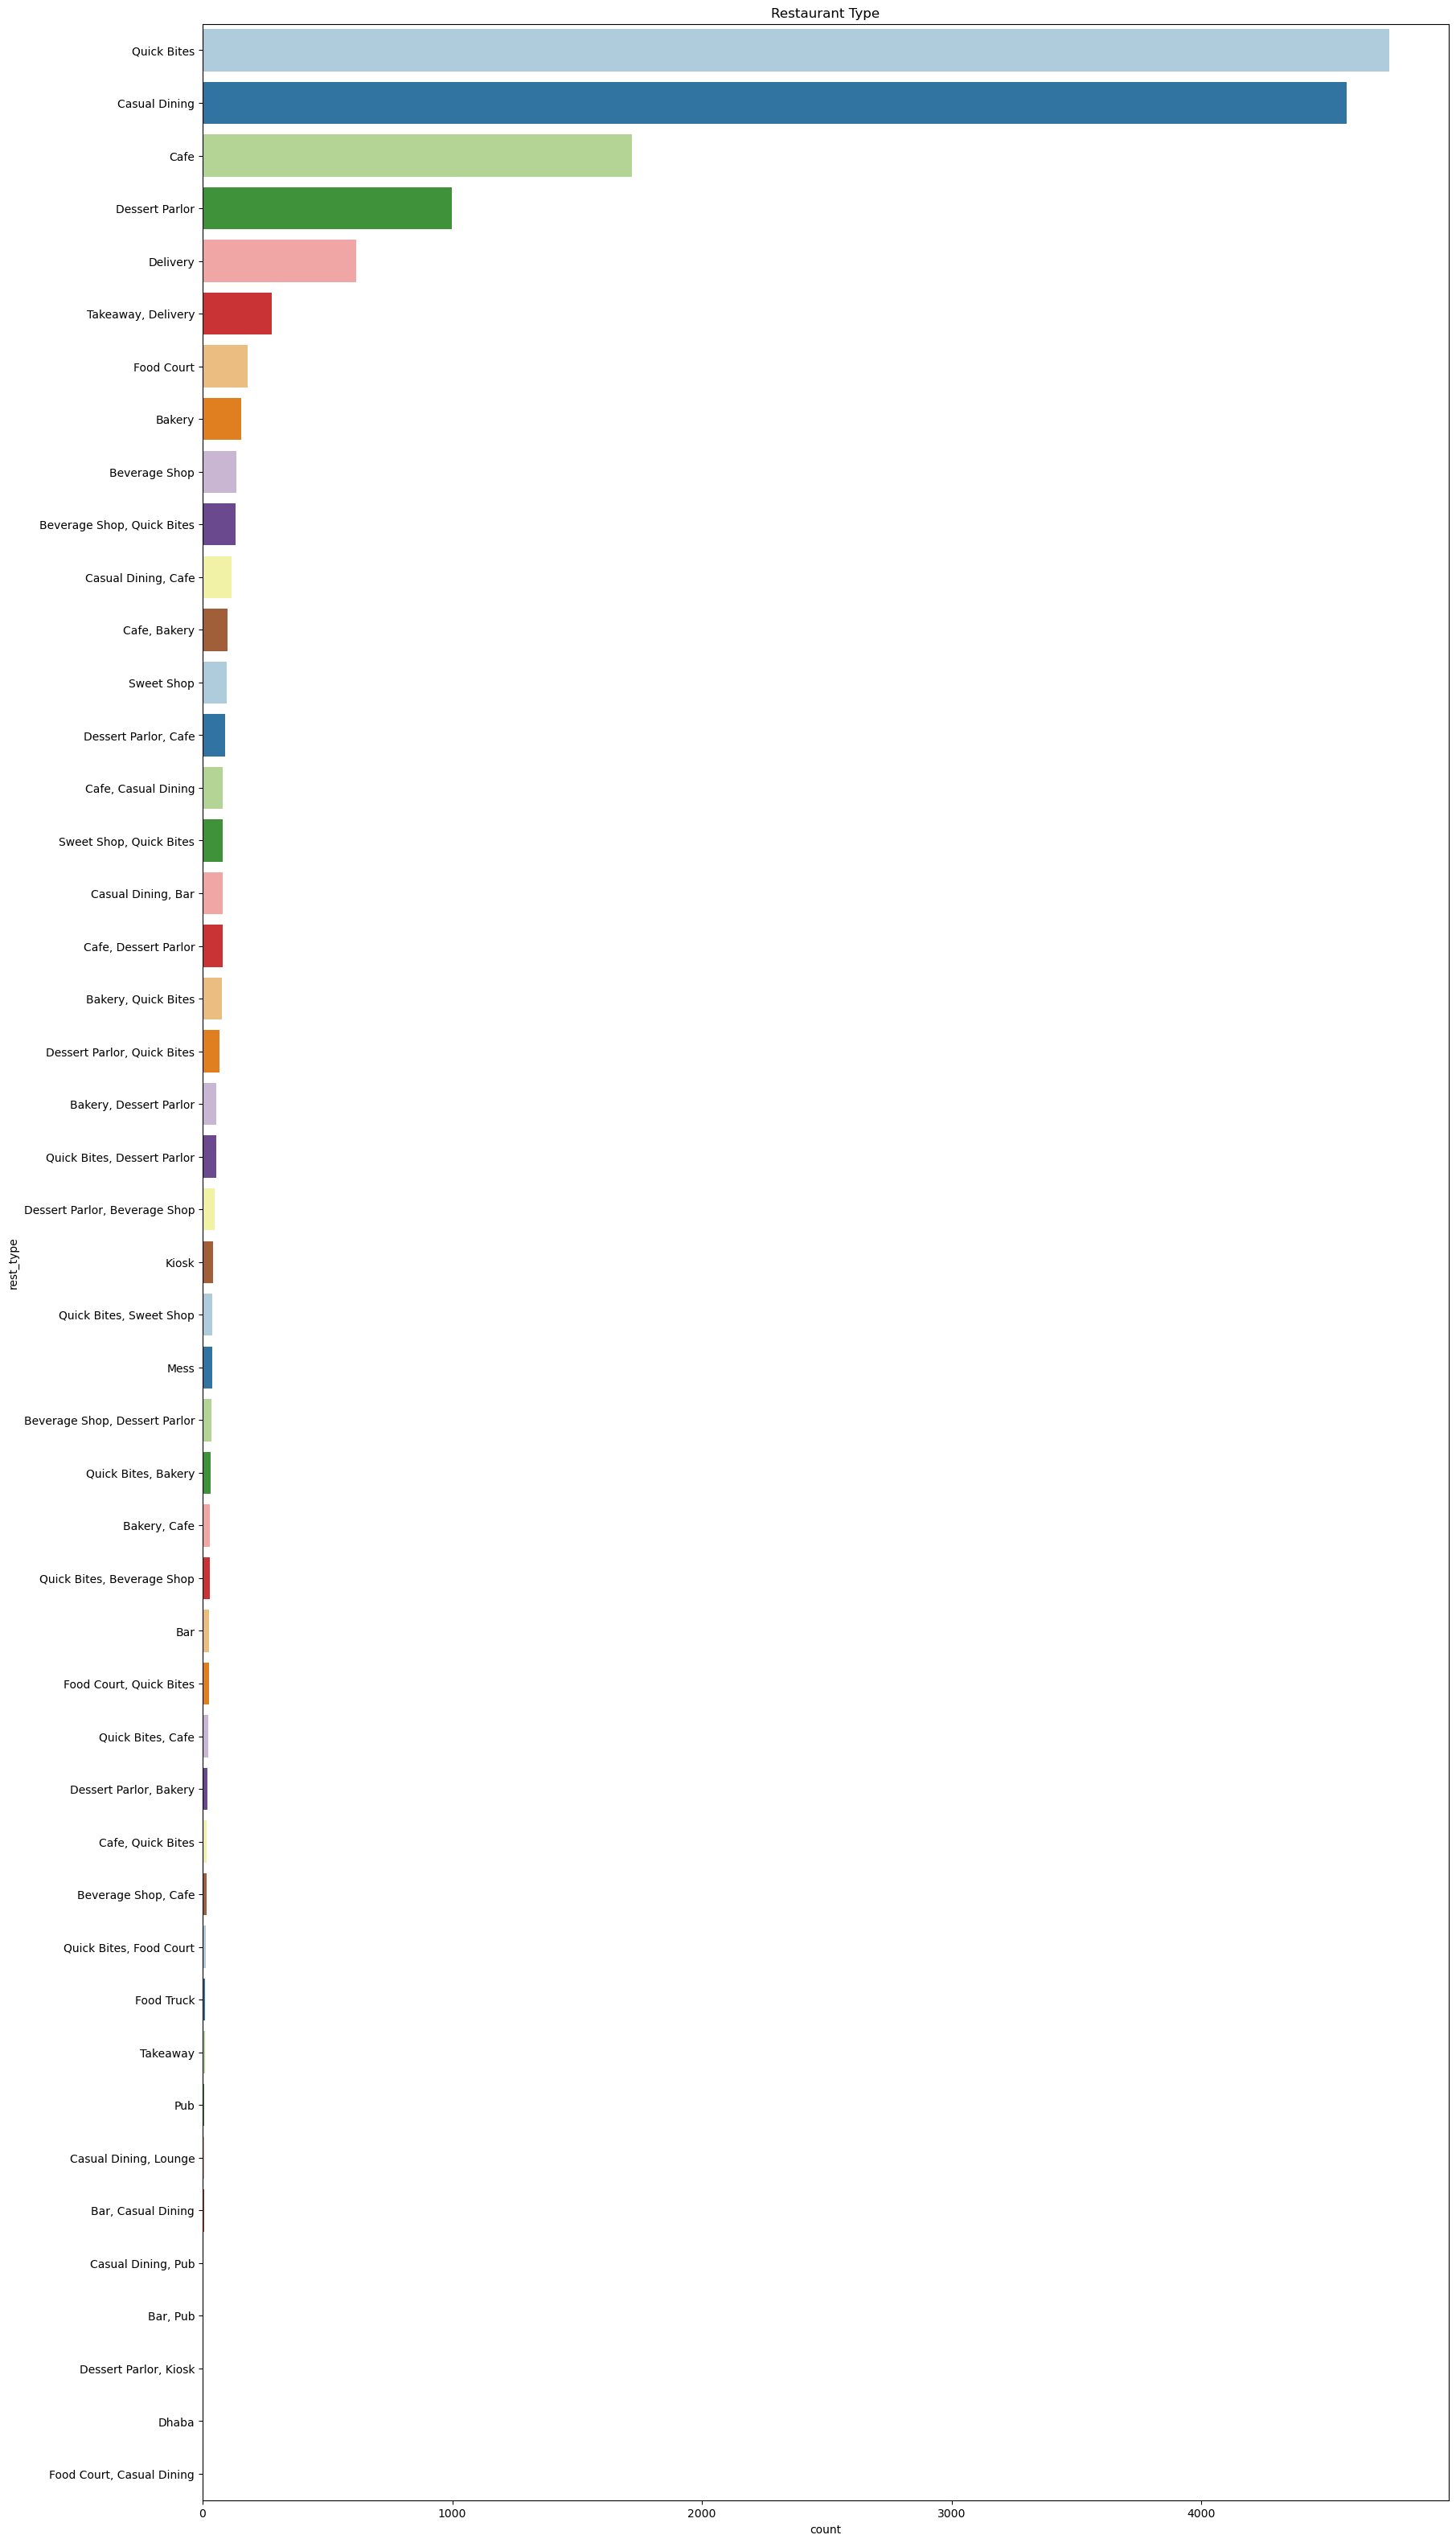

In [42]:
plt.figure(figsize=(20,40))
t=df['rest_type'].value_counts()
sns.barplot(y=t.index,x=t,palette='Paired')
plt.title('Restaurant Type')
plt.show()


Insight:
    
    
    'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant.
    'Food Court, Casual Dining', 'Dhaba' are the least common.
     

## 3.7 Most Liked Dishes

In [43]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [44]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

 Pasta               1199
 Burgers              916
 Coffee               892
 Sandwiches           858
Burgers               836
 Paratha              834
 Biryani              677
 Chicken Biryani      661
 Thali                643
 Mutton Biryani       635
 Tea                  619
 Fries                608
Coffee                601
 Pizza                596
 Sandwich             592
Biryani               533
 Hot Chocolate        516
 Butter Chicken       515
 Roti                 512
 Noodles              509
 Brownie              482
 Rolls                456
 Chaat                452
 Nachos               440
 Chicken Curry        434
 Tandoori Chicken     414
 Masala Dosa          401
 Fish                 396
Rolls                 386
 Pav Bhaji            382
Name: count, dtype: int64

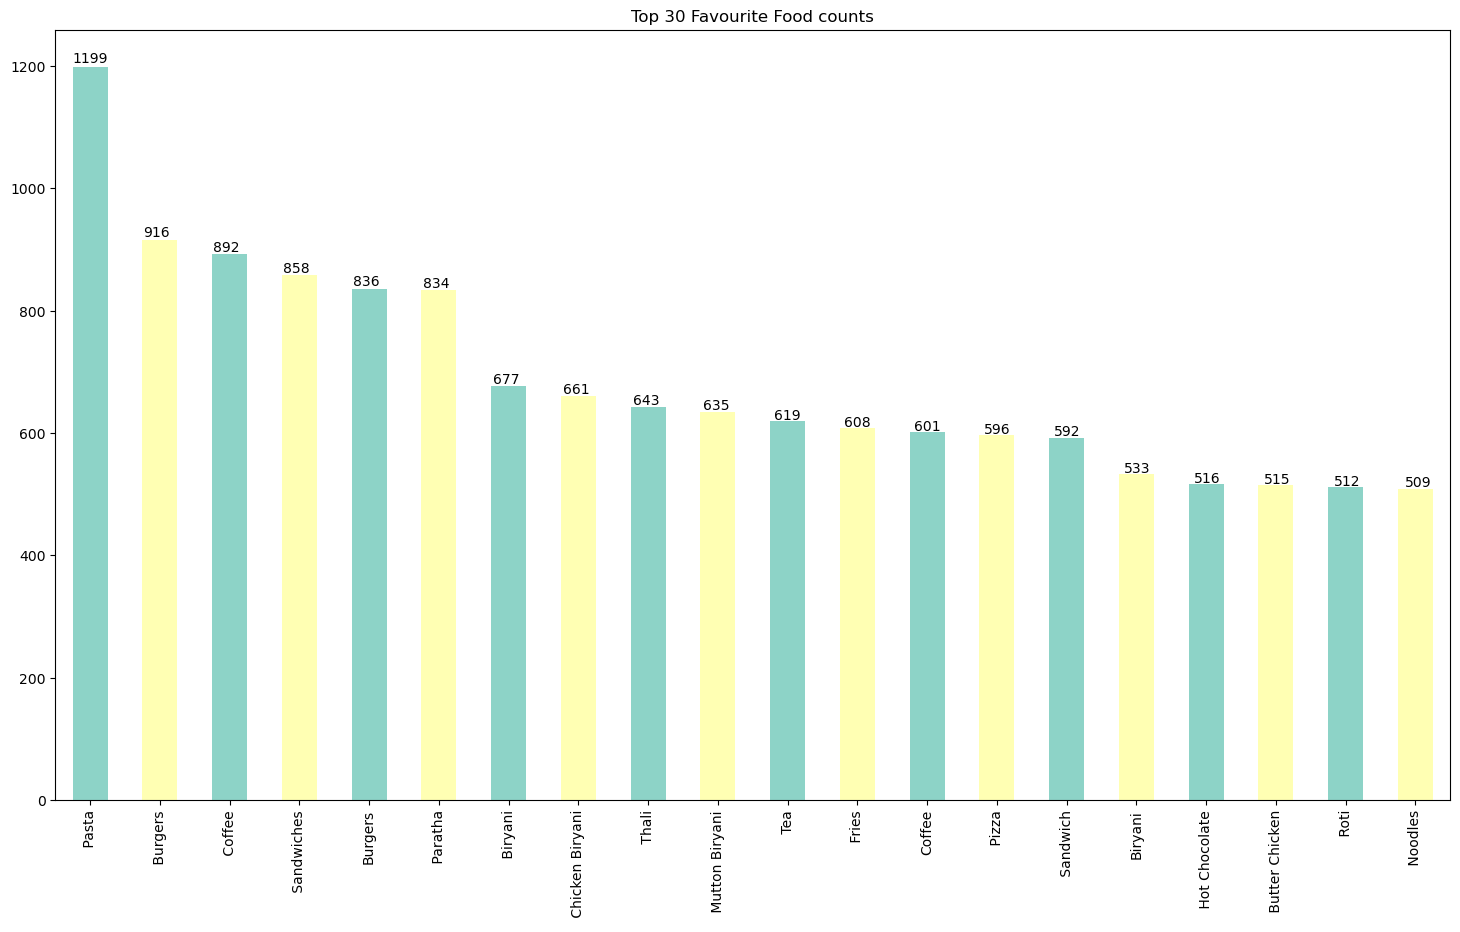

In [45]:
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

ax = favourite_food.nlargest(n = 20, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Top 30 Favourite Food counts', color =  color)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

Insights:

      here form above we can see that pasta & Burgers most famous           food in bangalore restaurants.

## 3.8 Most popular cuisines of Bangalore

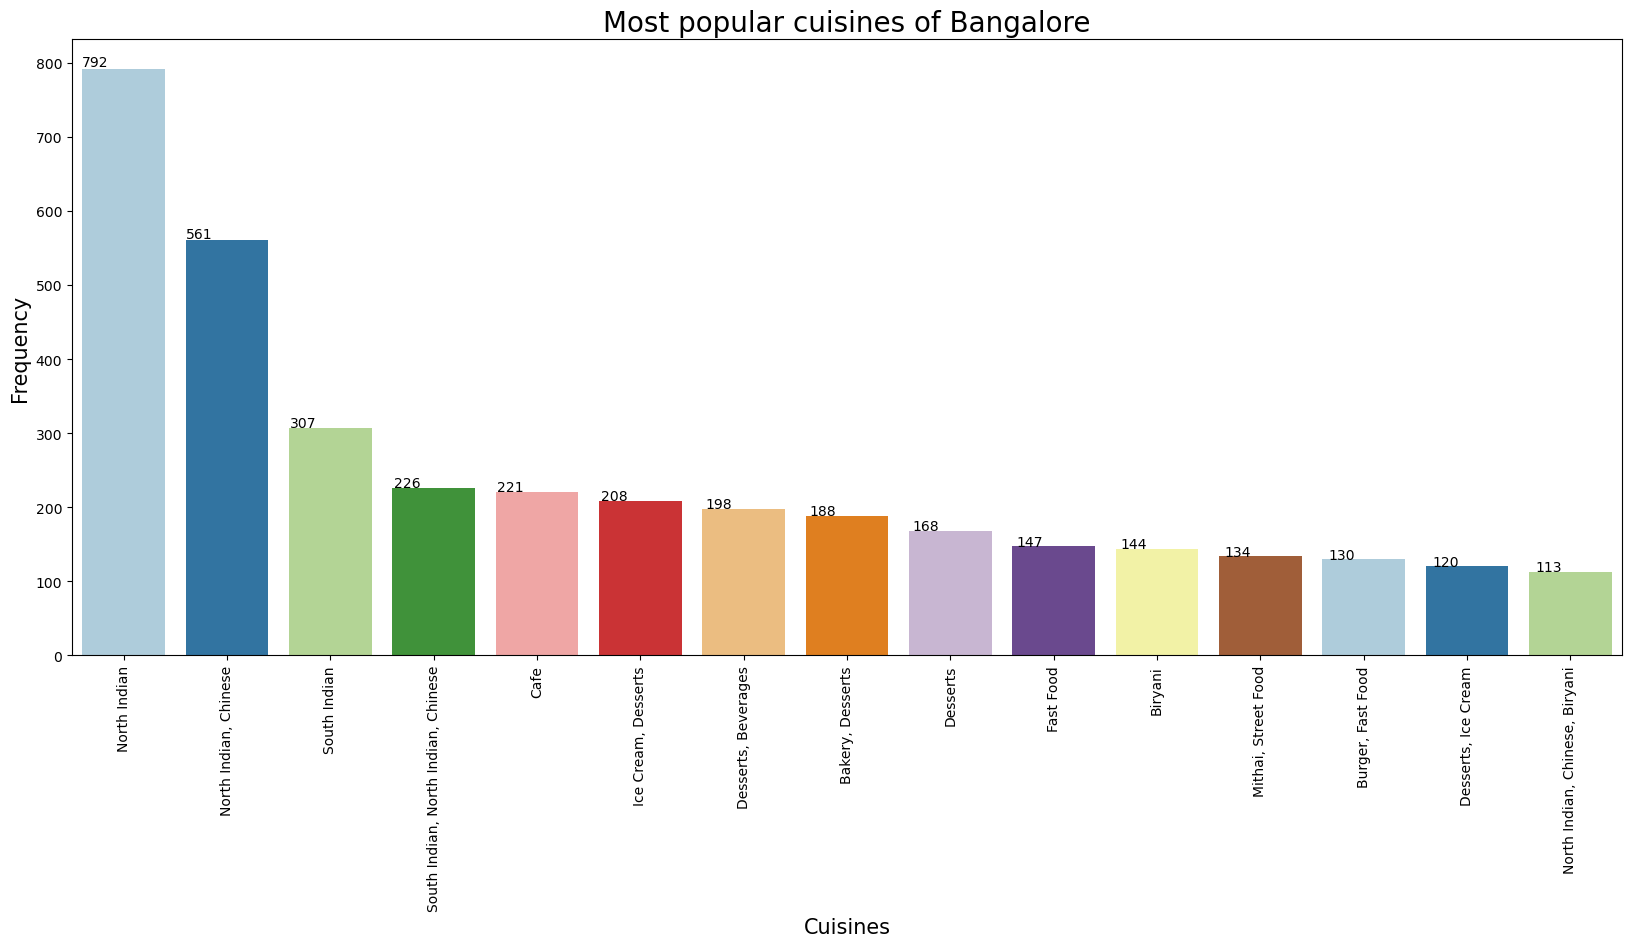

In [46]:
v=df['cuisines'].value_counts()[:15]
plt.figure(figsize=(20,8))

ax=sns.barplot(x= v.index, y=v, palette='Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int),(i.get_x()*1.005,i.get_height()*1.005))
    
plt.title('Most popular cuisines of Bangalore',fontsize=20)
plt.xlabel('Cuisines',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Insight:
    
    Here form above we can see that North Indian,North Indian Cuisines are most famous in Bangalore

## 3.9 Distribution of Cost of Food for people

Contains the approximate cost of meal for two people

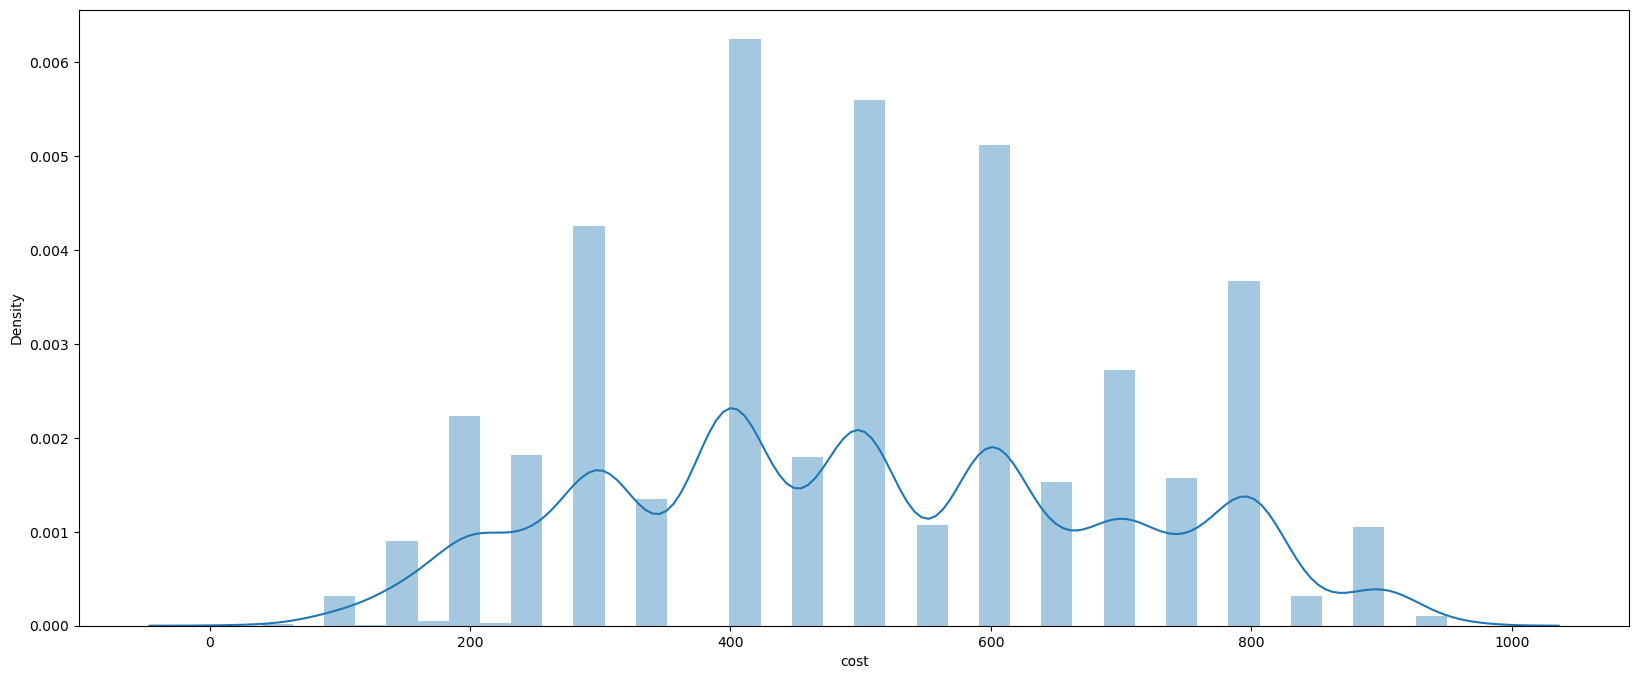

In [47]:
plt.figure(figsize=(20,8))
sns.distplot(df['cost'])
plt.show()

In [48]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

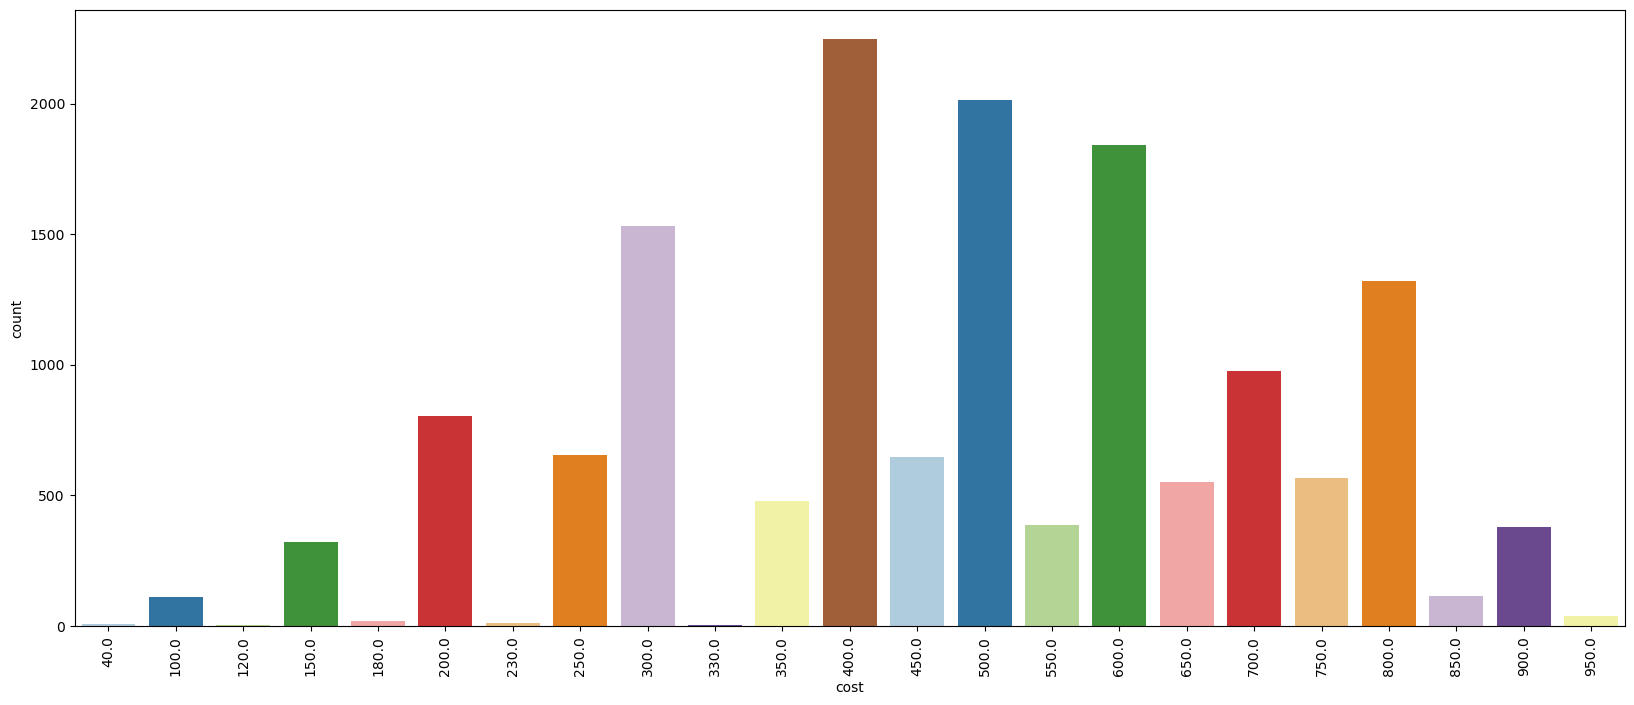

In [49]:
v= df['cost'].value_counts()
plt.figure(figsize=(20,8))

sns.barplot(x = v.index, y = v, palette='Paired')
plt.xticks(rotation=90)
plt.show()

Insight:
   
   Here form above we can see that most common price for two          person is 400 in Bangalore restaurant

## 3.10 Service Types

In [50]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [51]:
df['type'].dtype

dtype('O')

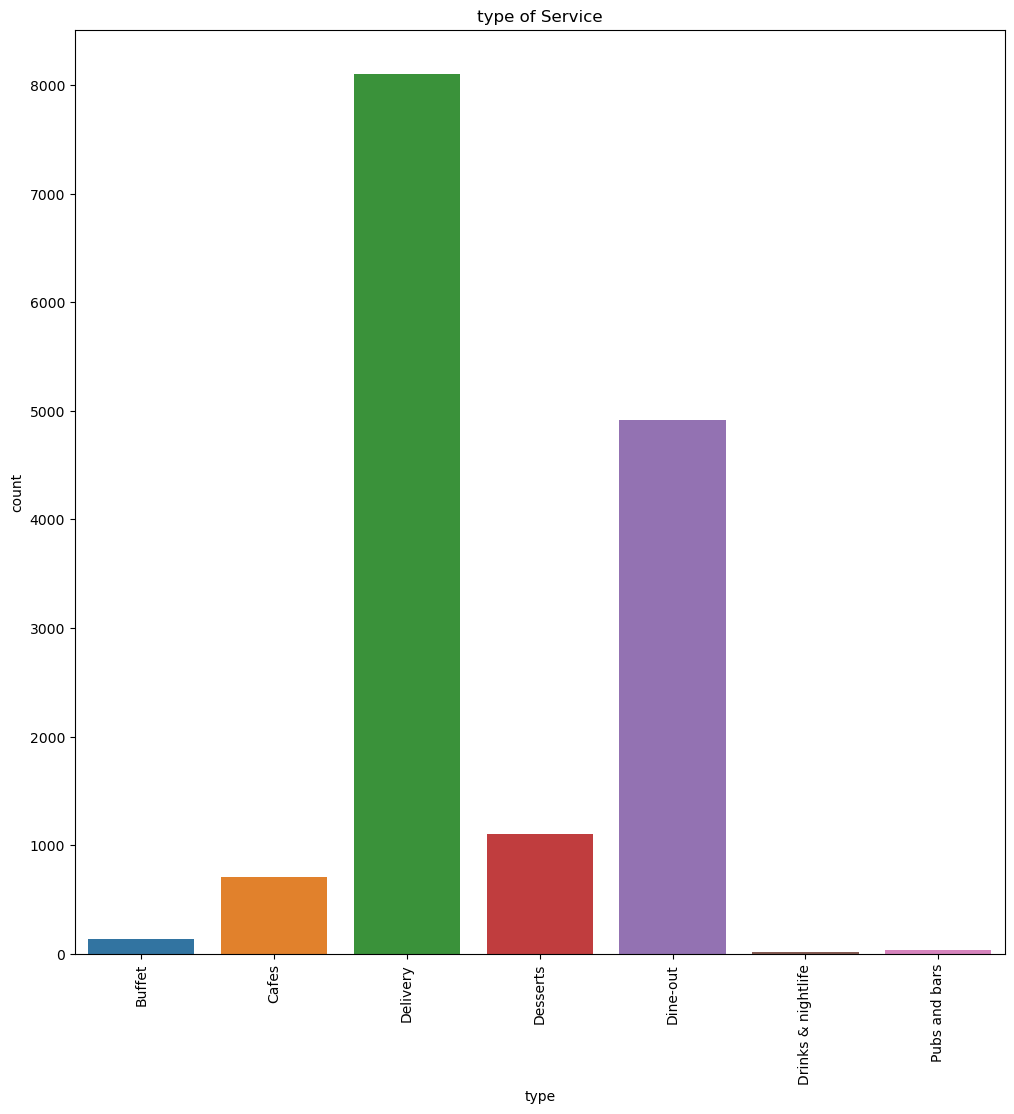

In [52]:
plt.figure(figsize=(12,12))
sns.countplot(x=df['type'])
plt.xticks(rotation=90)
plt.title('type of Service')
plt.show()

Insight:
    
     Here the two main service types are Delivery and Dine-out.

## 3.11 Highest vote of restaurant

In [53]:
df['votes']=df['votes'].astype('int')

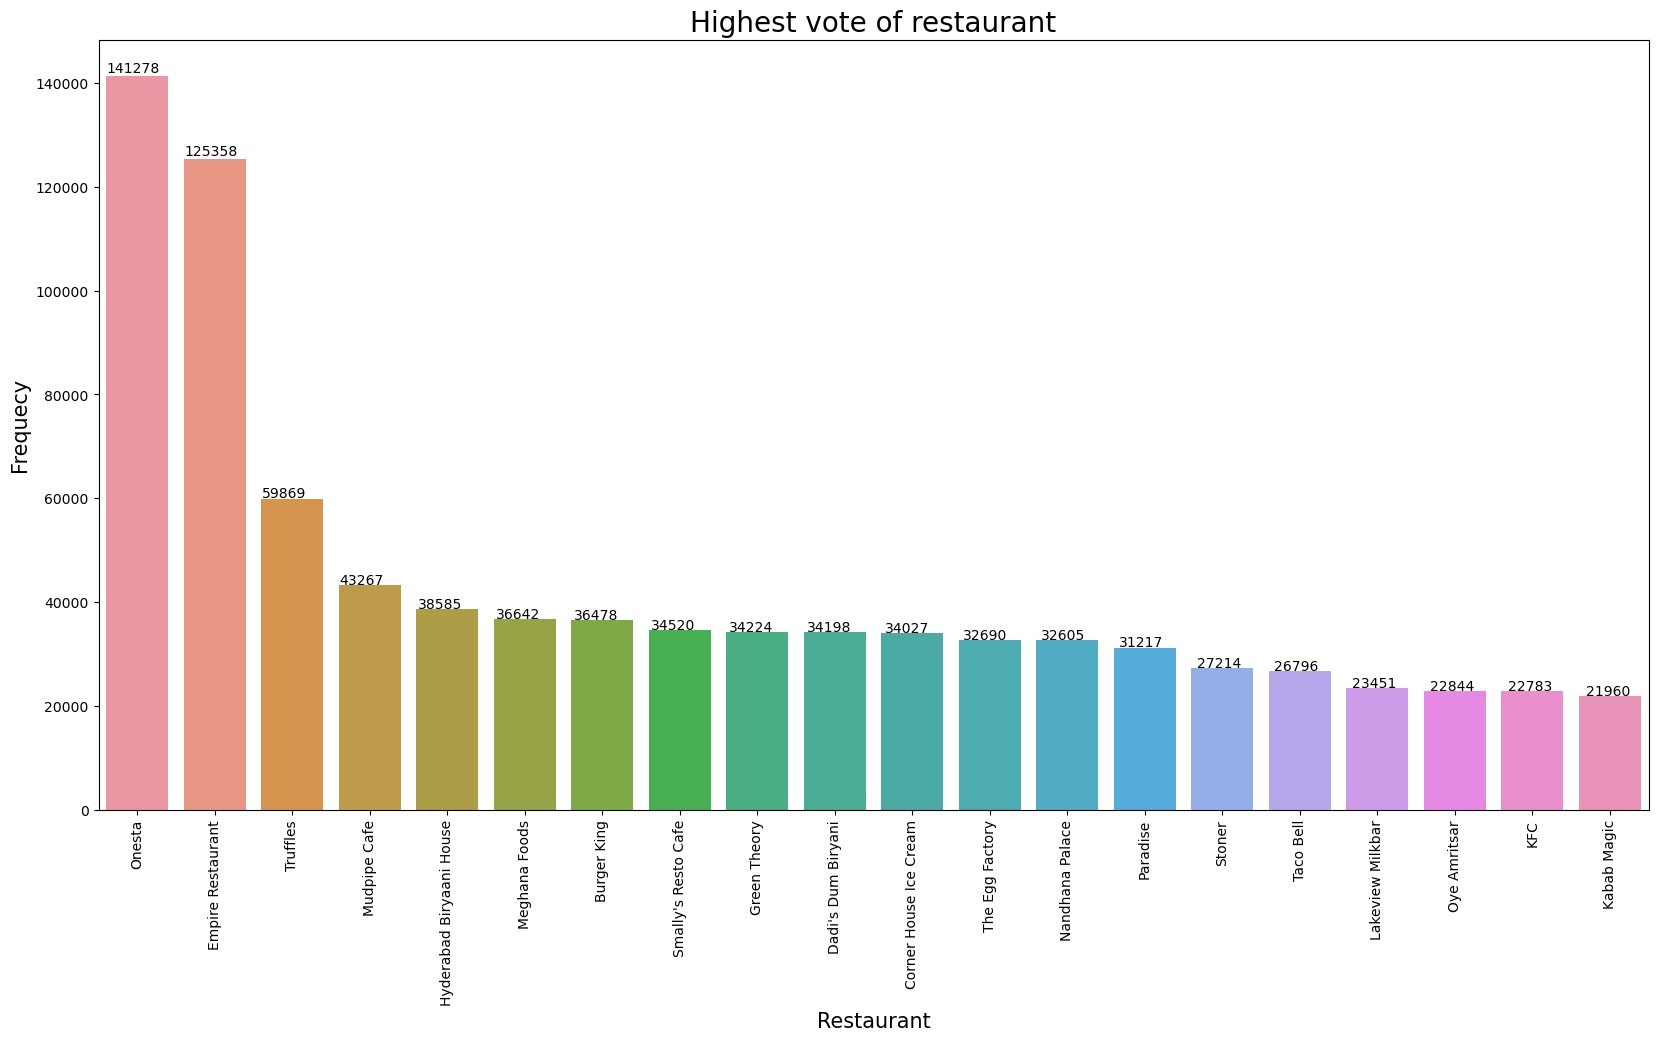

In [54]:
name_grp = df.groupby('name')
v = name_grp['votes'].agg(np.sum).sort_values(ascending = False)[:20]  ## Here i selected 20 restaurant based on high votes

plt.figure(figsize = (20,10))
ax = sns.barplot(y = v, x = v.index)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()* 1.005, i.get_height()*1.005))


plt.title('Highest vote of restaurant', fontsize = 20)
plt.xlabel('Restaurant', fontsize = 15)
plt.ylabel('Frequecy', fontsize = 15)
plt.xticks(rotation =90)
plt.show()


Insights:

Here from the analysis, we can see that 'Onesta', 'Truffles' & 'Empire Restaurant' are highly voted restaurants.

# 4. Data preparing

In [55]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 4.1 convert the online categorical variable into numeric format

In [56]:
df.online_order[df.online_order == 'Yes']=1
df.online_order[df.online_order == 'No']=0

In [57]:
df.online_order.value_counts()

online_order
1    11997
0     3021
Name: count, dtype: int64

## 4.2 LabelEncoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.location=le.fit_transform(df.location)
df.rest_type=le.fit_transform(df.rest_type)
df.cuisines=le.fit_transform(df.cuisines)
df.menu_item=le.fit_transform(df.menu_item)

df.book_table=le.fit_transform(df.book_table)

In [59]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,16,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",947,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",3976,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,16,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",459,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",3976,Buffet,Banashankari


In [60]:
my_data=df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]]
my_data.to_csv('Zomato_df.csv')

In [61]:
my_data.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item
0,1,1,4.1,775,1,16,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",947,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",3976
1,1,0,4.1,787,1,16,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",459,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",3976
2,1,0,3.8,918,1,13,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",374,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3976
3,0,0,3.7,88,1,36,Masala Dosa,1096,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",3976
4,0,0,3.8,166,4,16,"Panipuri, Gol Gappe",957,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",3976


In [62]:
my_data.shape

(15018, 11)

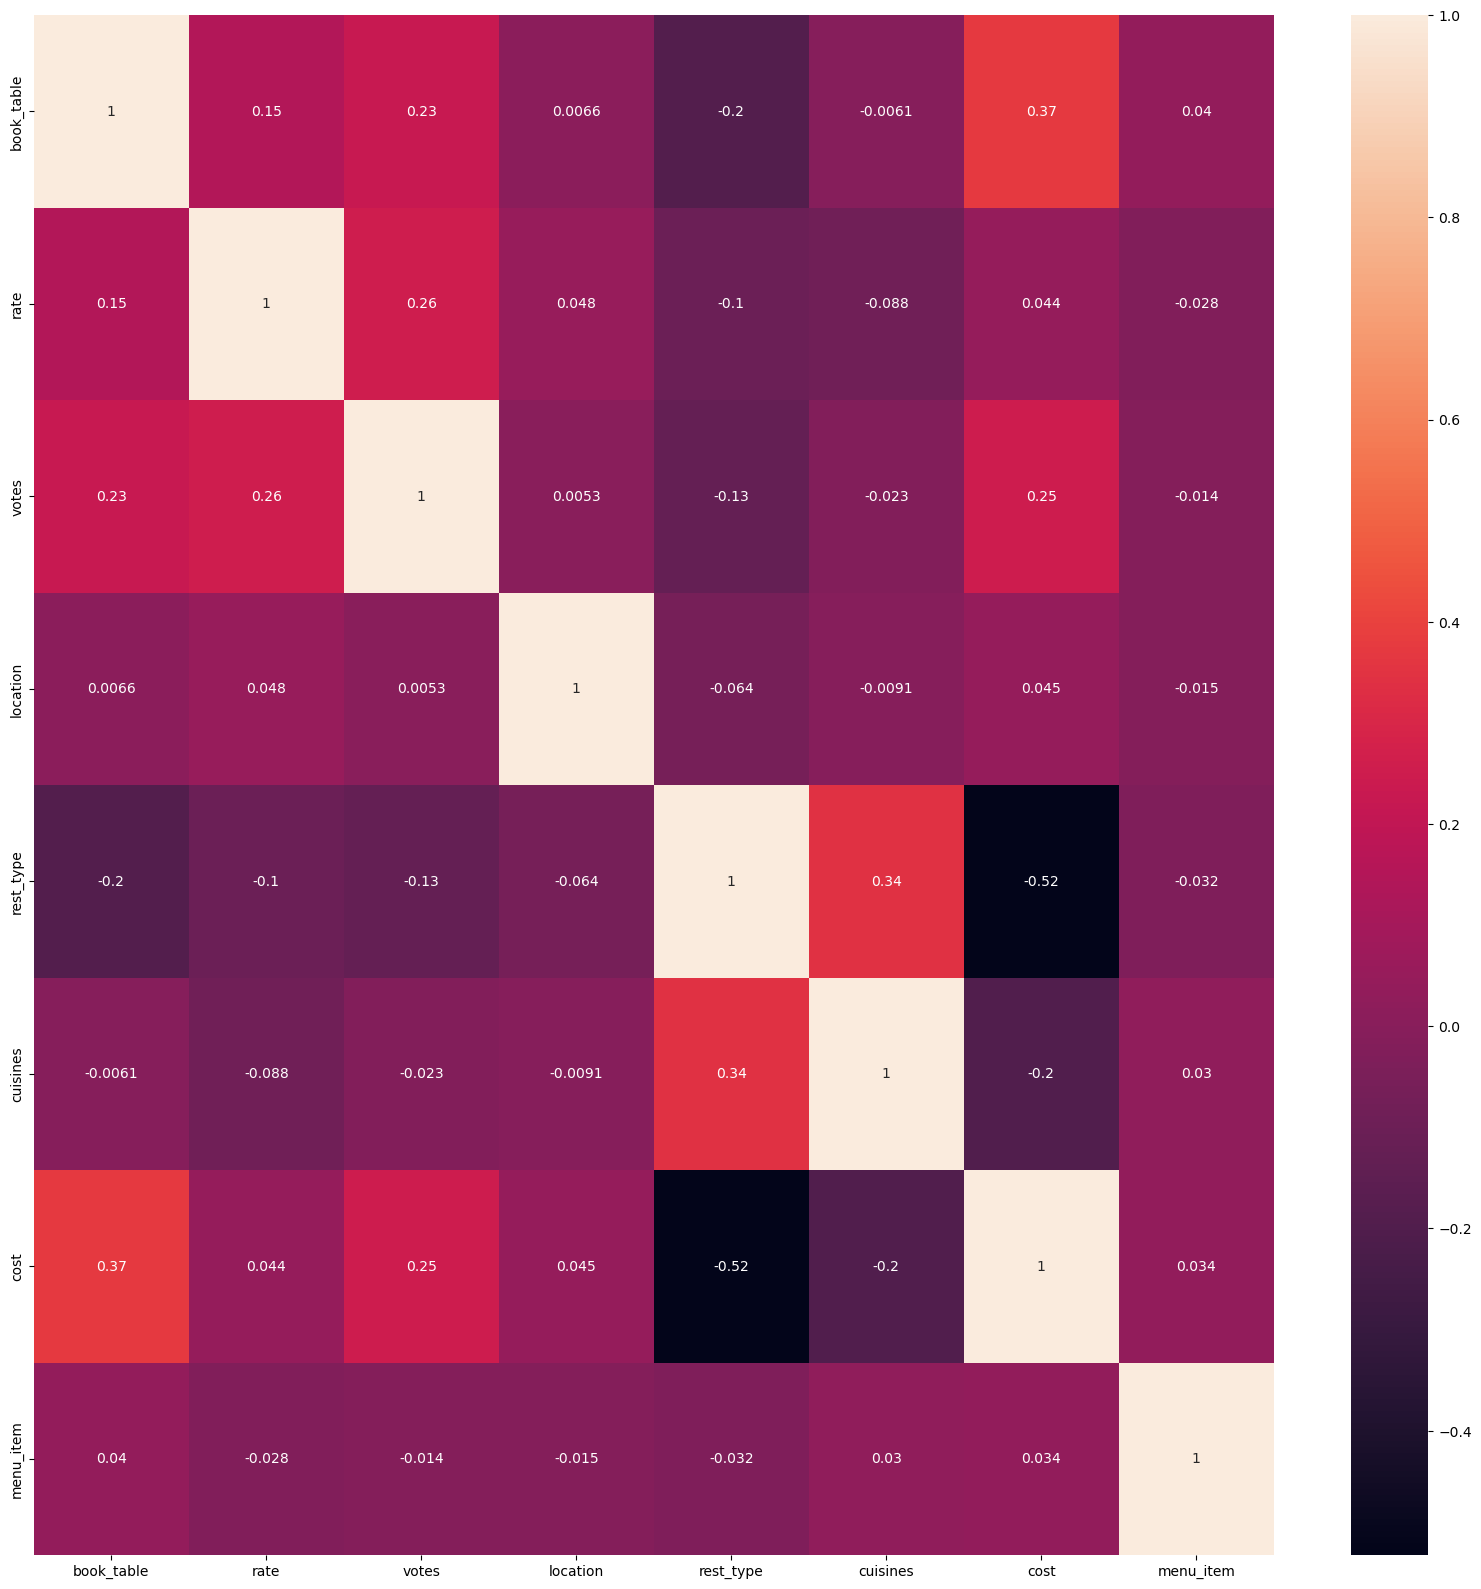

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(my_data.corr(numeric_only=True),annot=True)
plt.show()


Insights:

Here from the above we can see that rate is higly correlated with votes.

## 4.3 Dependent and indeopendent variable

In [64]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

In [65]:
x

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,16,947,800.0,3976
1,1,0,787,1,16,459,800.0,3976
2,1,0,918,1,13,374,800.0,3976
3,0,0,88,1,36,1096,300.0,3976
4,0,0,166,4,16,957,600.0,3976
...,...,...,...,...,...,...,...,...
15013,1,0,182,25,29,1154,600.0,3234
15014,1,0,252,9,36,124,400.0,3871
15015,1,0,49,9,36,570,300.0,1182
15016,0,0,81,82,17,45,800.0,3976


In [66]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
15013    3.8
15014    3.4
15015    3.6
15016    2.5
15017    2.5
Name: rate, Length: 15018, dtype: float64

## 4.4 splitting data into train and test set

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [69]:
x_train.shape

(10512, 8)

In [70]:
y_train.shape

(10512,)

# 5. Modeling

# 5.1 Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

#predict the test set
y_pred=lr.predict(x_test)

#Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


0.08670612498270147


## 5.2  DecisionTree Regression

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

#predict the test set
y_pred=dtr.predict(x_test)

#Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.7299880859706838


## 5.3 Random Forest Regressor 

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

#predict the test set
y_pred=rfr.predict(x_test)

#Evaluate the model performance
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8422106670593991


## 5.4 Support vector Regressor

In [77]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

#predict the test set
y_pred=svr.predict(x_test)

#Evaluate the model performance
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))   

0.0858877008839316


## 5.5 Extra tree Regressor

Extra Trees is like a Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. So in summary, ExtraTrees:


    builds multiple trees with bootstrap = False by default, which means it samples without replacement.

    nodes are split based on random splits among a random subset of the features selected at every node

In Extra Trees, randomness doesn’t come from bootstrapping the data, but rather comes from the random splits of all observations. ExtraTrees is named for (Extremely Randomized Trees).

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)

#Predict the test set
y_pred=etr.predict(x_test)

#Evaluate the model performance
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8801520037099652


# 6. Conclusion:-

From the analysis, 'McDonalds','KFC' & 'Piza Hut' are the most famous restaurant in bangalore.

Most Restaurants offer options for online order and delivery.

Most restaurants don't offer table booking.

From the analysis, most of the ratings are within 3.5 and 4.5.

From the analysis. we can see that most of the restaurants located in 'BTM','Koramangala 5th Block' & 'Indiranagar'.Then least restaurants are located 'KR Puram', 'Kanakapura', 'Magadi Road'.

'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of restaurant.And 'Food Court', 'Casual Dining', 'Dhaba' are the least common.

From the analysis, pasta & burgers most famous food in bangalore restaurants.

From the analysis, we can see that North Indian, North Indian Cuisines are most famous in bangalore restaurants.

Two main service types are Delivery and Dine-out.

From the analysis, we can see that 'Onesta', 'Truffles' & 'Empire Restaurant' are highly voted restaurants.

For the modeling part, i used LinearRegression, DecisionTree Regressor, RandomForest Regressor , Supprotvector Regressor & ExtraTree Regressor. From all these models ExtraTree Regressor perform well compared to the other models.So i selected ExtraTree Regressor for model creation.

